In [26]:
import numpy as np
import pywt
import os
from PIL import Image
from scipy.fftpack import dct
from scipy.fftpack import idct
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import cv2


In [27]:
original_image_path = r"Input.png"
watermark_image_path = r"Watermark1.jpg"

In [28]:
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value

def calculate_entropy(image):
    histogram = np.histogram(image, bins=256, range=(0, 256))[0]
    histogram = histogram / histogram.sum()
    entropy = -np.sum(histogram * np.log2(histogram + 1e-10))
    return entropy

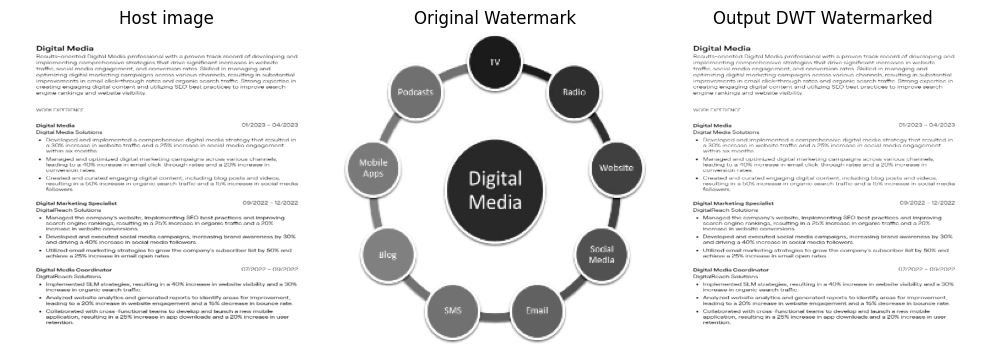

In [29]:
def embed_watermark_dwt(original_path, watermark_path, output_path='watermarked_image.png', alpha=0.1):
    # Load and resize both images to 512x512
    original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
    watermark = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)
    original = cv2.resize(original, (512, 512))
    watermark = cv2.resize(watermark, (256, 256))

    # Apply DWT to original image
    coeffs_original = pywt.dwt2(original, 'haar')
    LL, (LH, HL, HH) = coeffs_original

    # Embed watermark in LL band
    LL_watermarked = LL + alpha * watermark

    # Reconstruct image from modified coefficients
    watermarked = pywt.idwt2((LL_watermarked, (LH, HL, HH)), 'haar')
    watermarked = np.clip(watermarked, 0, 255).astype(np.uint8)

    plt.figure(figsize=(10, 6))

    plt.subplot(131)
    plt.imshow(original, cmap='gray')
    plt.title('Host image')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(watermark, cmap='gray')
    plt.title('Original Watermark')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(watermarked, cmap='gray')
    plt.title('Output DWT Watermarked')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    
    return watermarked

# Example usage
watermarked = embed_watermark_dwt(original_image_path, watermark_image_path)

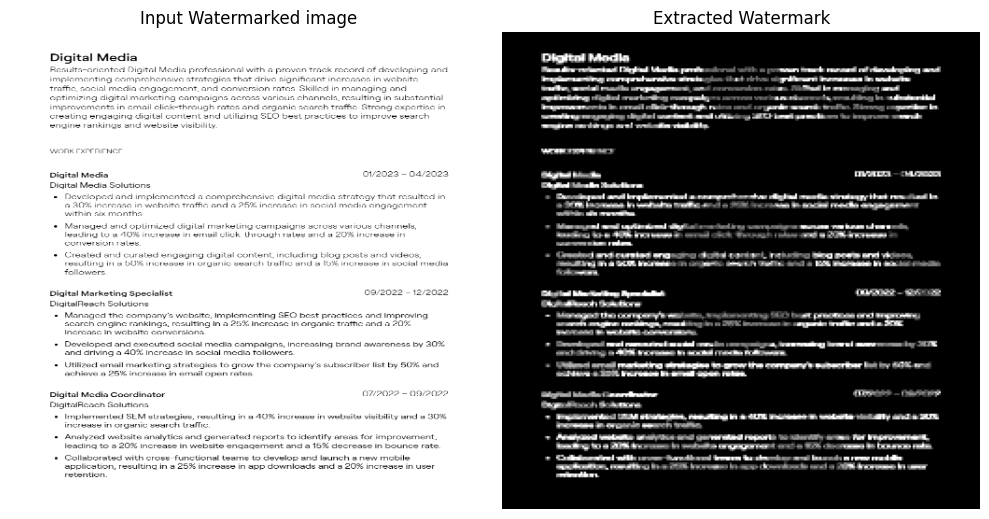

In [30]:
def extract_watermark_dwt(watermarked, original_path, alpha=0.1):
    # Load and resize both images to 512x512
    original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
    watermarked = cv2.resize(watermarked, (512, 512))
    original = cv2.resize(original, (512, 512))

    # Apply DWT to both
    coeffs_wm = pywt.dwt2(watermarked, 'haar')
    LL_wm, _ = coeffs_wm

    coeffs_orig = pywt.dwt2(original, 'haar')
    LL_orig, _ = coeffs_orig

    # Extract watermark
    watermark_extracted = (LL_wm - LL_orig) / alpha
    watermark_extracted = np.clip(watermark_extracted, 0, 255).astype(np.uint8)
     
    plt.figure(figsize=(10, 6))
    plt.subplot(121)
    plt.imshow(watermarked, cmap='gray')
    plt.title('Input Watermarked image')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(watermark_extracted, cmap='gray')
    plt.title('Extracted Watermark')
    plt.axis('off')


    plt.tight_layout()
    plt.show()
    return watermark_extracted
# Example usage
watermark_extracted = extract_watermark_dwt(watermarked,original_image_path)

In [31]:
watearmakr = cv2.imread(watermark_image_path, cv2.IMREAD_GRAYSCALE)
watearmakr = cv2.resize(watearmakr, (256, 256))
watermark_extracted = cv2.resize(watermark_extracted, (256, 256))

psnr_value = psnr(watearmakr, watermark_extracted)
print(f"PSNR: {psnr_value} dB")
mse_value = np.mean((watearmakr - watermark_extracted) ** 2)/100
print(f"MSE: {mse_value}")
entropy_value = calculate_entropy(watermark_extracted)
print(f"Entropy: {entropy_value}")

PSNR: 31.340793683441298 dB
MSE: 0.4775303649902344
Entropy: 1.9696463910629474


In [32]:
model = 'haar'
level = 1
img1 = Image.open(original_image_path).resize((2048, 2048), 1)
img = img1.convert('L') 
image_array = np.array(img.getdata(), dtype=np.float).reshape((2048, 2048))

c:\users\asus\python376\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [33]:
size=128
watermark1 = Image.open(watermark_image_path).resize((size, size), 1)
watermark = watermark1.convert('L') 
watermark_array = np.array(watermark.getdata(), dtype=np.float).reshape((size, size))

c:\users\asus\python376\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [34]:
#TIWT
coeffs=pywt.wavedec2(data = image_array, wavelet = model, level = level)
    # print coeffs[0].__len__()
coeffs_H=list(coeffs) 
   

In [35]:
def apply_pca(image_array):
    size = image_array[0].__len__()
    all_subpca = np.empty((size, size))
    for i in range (0, size, 8):
        for j in range (0, size, 8):
            subpixels = image_array[i:i+8, j:j+8]
            subpca = dct(dct(subpixels.T, norm="ortho").T, norm="ortho")
            all_subpca[i:i+8, j:j+8] = subpca

    return all_subpca

In [36]:
def embed_watermark(watermark_array, orig_image):
    watermark_array_size = watermark_array[0].__len__()
    watermark_flat = watermark_array.ravel()
    ind = 0

    for x in range (0, orig_image.__len__(), 8):
        for y in range (0, orig_image.__len__(), 8):
            if ind < watermark_flat.__len__():
                subpca = orig_image[x:x+8, y:y+8]
                subpca[5][5] = watermark_flat[ind]
                orig_image[x:x+8, y:y+8] = subpca
                ind += 1 


    return orig_image

In [37]:
def inverse_pca(all_subpca):
    size = all_subpca[0].__len__()
    all_subipca = np.empty((size, size))
    for i in range (0, size, 8):
        for j in range (0, size, 8):
            subipca = idct(idct(all_subpca[i:i+8, j:j+8].T, norm="ortho").T, norm="ortho")
            all_subipca[i:i+8, j:j+8] = subipca

    return all_subipca


In [38]:
pca_array = apply_pca(coeffs_H[0])

In [39]:
pca_array = embed_watermark(watermark_array, pca_array)


In [40]:
coeffs_H[0] = inverse_pca(pca_array)


In [41]:
image_array_H=pywt.waverec2(coeffs_H, model)


In [42]:
image_array_copy = image_array_H.clip(0, 255)
image_array_copy = image_array_copy.astype("uint8")
watermarked_img = Image.fromarray(image_array_copy)

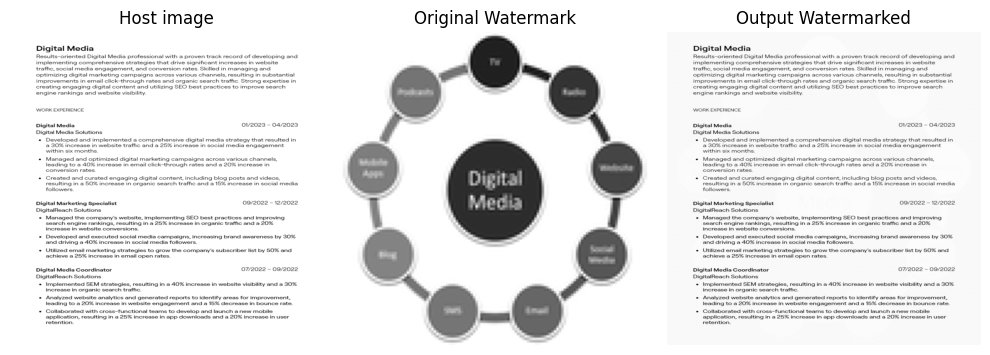

In [43]:
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Host image')
plt.axis('off')

plt.subplot(132)
plt.imshow(watermark, cmap='gray')
plt.title('Original Watermark')
plt.axis('off')

plt.subplot(133)
plt.imshow(watermarked_img, cmap='gray')
plt.title('Output Watermarked')
plt.axis('off')

plt.tight_layout()
plt.show()

In [44]:
def get_watermark(pca_watermarked_coeff, watermark_size):
    
    subwatermarks = []

    for x in range (0, pca_watermarked_coeff.__len__(), 8):
        for y in range (0, pca_watermarked_coeff.__len__(), 8):
            coeff_slice = pca_watermarked_coeff[x:x+8, y:y+8]
            subwatermarks.append(coeff_slice[5][5])

    watermark = np.array(subwatermarks).reshape(watermark_size, watermark_size)

    return watermark


In [45]:
coeffs=pywt.wavedec2(data = image_array_H, wavelet = model, level = level)
    # print coeffs[0].__len__()
coeffs_watermarked_image=list(coeffs) 
   

In [46]:
pca_watermarked_coeff = apply_pca(coeffs_watermarked_image[0])


In [47]:
watermark_array = get_watermark(pca_watermarked_coeff, 128)


In [48]:
watermark_array =  np.uint8(watermark_array)


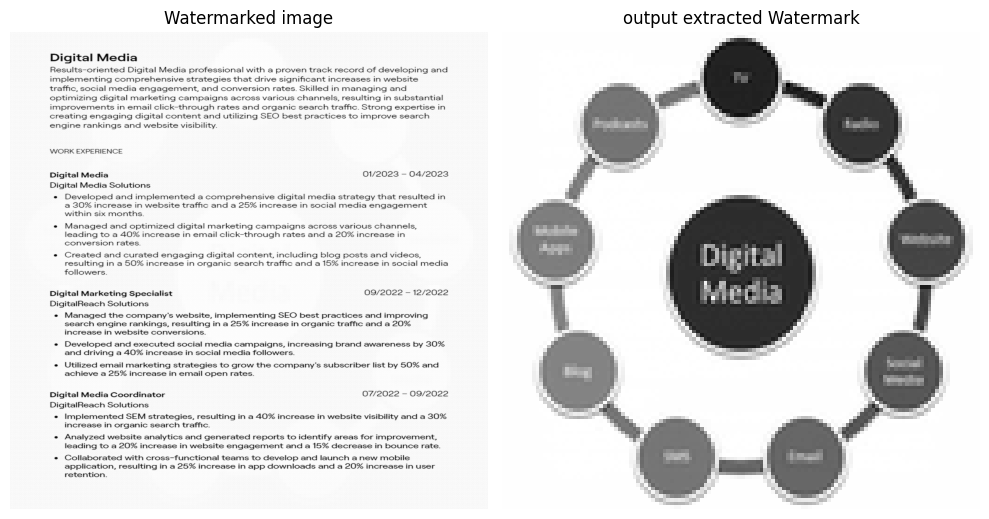

In [49]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(watermarked_img, cmap='gray')
plt.title('Watermarked image')
plt.axis('off')

plt.subplot(122)
plt.imshow(watermark_array, cmap='gray')
plt.title('output extracted Watermark')
plt.axis('off')

plt.tight_layout()
plt.show()

In [50]:
host_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
host_image = cv2.resize(host_image, (256, 256))
watermarked_img = watermarked_img.resize((256, 256), 1)
psnr_value = psnr(host_image, watermarked_img)
print(f"PSNR: {psnr_value} dB")
mse_value = np.mean((host_image - watermarked_img) ** 2)/100
print(f"MSE: {mse_value}")
entropy_value = calculate_entropy(watermarked_img)
print(f"Entropy: {entropy_value}")

PSNR: 30.653375047591183 dB
MSE: 0.55942626953125
Entropy: 4.347811977522391
